### Image classification as a regression problem.
### Adapted from original post on classification:
https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

In [29]:
import tensorflow as tf
import numpy as np

from keras.datasets import mnist
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

import matplotlib.pyplot as plt

In [30]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [8]:
# load data and cast for regression
(X_train, y_train), (X_test, y_test) = mnist.load_data()
y_train = y_train.astype(np.float32)
y_test  = y_test.astype(np.float32)

In [10]:
# flatten 28*28 image to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train    = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test     = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [11]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test  = X_test / 255

In [12]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='linear'))
    # Compile model
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    return model

In [13]:
# build the model
model = baseline_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 785       
Total params: 616,225
Trainable params: 616,225
Non-trainable params: 0
_________________________________________________________________


In [14]:
print(">>> Number of parameters in first layer: ", num_pixels*num_pixels + num_pixels)
print(">>> Number of parameters in second layer", 10*num_pixels + 10)

>>> Number of parameters in first layer:  615440
>>> Number of parameters in second layer 7850


In [15]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
 - 4s - loss: 2.7546 - mean_squared_error: 2.7546 - val_loss: 1.3944 - val_mean_squared_error: 1.3944
Epoch 2/40
 - 3s - loss: 1.1199 - mean_squared_error: 1.1199 - val_loss: 0.9954 - val_mean_squared_error: 0.9954
Epoch 3/40
 - 3s - loss: 0.8375 - mean_squared_error: 0.8375 - val_loss: 0.8469 - val_mean_squared_error: 0.8469
Epoch 4/40
 - 3s - loss: 0.6987 - mean_squared_error: 0.6987 - val_loss: 0.7705 - val_mean_squared_error: 0.7705
Epoch 5/40
 - 3s - loss: 0.5916 - mean_squared_error: 0.5916 - val_loss: 0.7203 - val_mean_squared_error: 0.7203
Epoch 6/40
 - 3s - loss: 0.5238 - mean_squared_error: 0.5238 - val_loss: 0.7091 - val_mean_squared_error: 0.7091
Epoch 7/40
 - 4s - loss: 0.4760 - mean_squared_error: 0.4760 - val_loss: 0.6507 - val_mean_squared_error: 0.6507
Epoch 8/40
 - 4s - loss: 0.4109 - mean_squared_error: 0.4109 - val_loss: 0.6161 - val_mean_squared_error: 0.616

In [21]:
#--- Lets test the model
y_pred = model.predict(X_test)

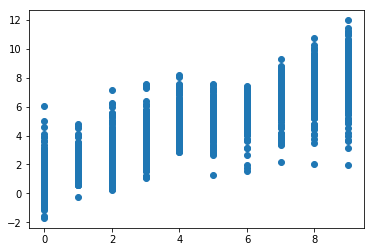

In [22]:
plt.scatter(y_test, y_pred)
plt.show()

***
***
***

In [23]:
#
#  https://www.kernix.com/blog/a-toy-convolutional-neural-network-for-image-classification-with-keras_p14
#
def plot_confusion_matrix(y_true,y_pred):
    cm_array = confusion_matrix(y_true,y_pred)
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    plt.imshow(cm_array, interpolation='nearest', cmap=plt.cm.jet)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

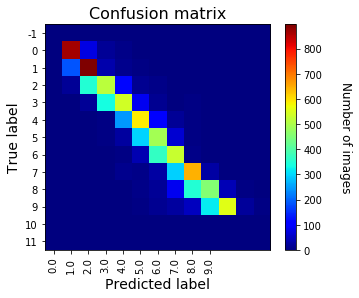

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
plot_confusion_matrix(y_test,y_pred.astype(np.int8))